In [125]:
# DATA PREPARATION

#  1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  1.2 Load the data
df = pd.read_csv("messy_stock_data.csv", sep=";", parse_dates=['Date'], dayfirst=True)

#  1.3 Initial view
print(" Raw Data Sample:")
display(df.head())

#  1.4 Data Cleaning
print("\n🔧 DATA CLEANING:")

# Drop rows with missing Product_ID
df = df.dropna(subset=['Product_ID'])

# Standardize text casing
df['Warehouse'] = df['Warehouse'].str.upper()
df['Supplier'] = df['Supplier'].str.title()
df['Category'] = df['Category'].str.title()

# Clean and convert numeric columns
df['Units_Sold'] = df['Units_Sold'].str.replace(',', '.').astype(float)
df['Price'] = df['Price'].str.replace(',', '.').astype(float)

# Normalize discount values (assumes "%" or decimal)
df['Discount'] = df['Discount'].replace('%', '', regex=True).astype(float)
df.loc[df['Discount'] > 1, 'Discount'] /= 100  # Adjust if discount is like '25'

# Standardize stock values
df['In_Stock'] = df['In_Stock'].astype(str).str.strip().str.lower().replace({
    'yes': True, 'true': True, '1': True,
    'no': False, 'false': False, '0': False
})

# Remove duplicates
df = df.drop_duplicates()

# Fill missing values
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Discount'] = df['Discount'].fillna(0)

print("\n Cleaned Data Sample:")
display(df.head())


 Raw Data Sample:


,Product_ID,Date,Units_Sold,Price,Warehouse,Supplier,Category,Discount,In_Stock
0,PROD003,2023-04-02 00:00:00,"12,0","37,94",West,Supplier A,Clothing,17%,0
1,PROD010,2023-06-15 00:00:00,"9,0","31,94",West,Supplier B,Clothing,NaN,Yes
2,NaN,2023-07-24 00:00:00,"8,0","7,61",SOUTH,Supplier A,clothing,0.08,NO
3,PROD005,2023-12-28 00:00:00,"8,0","43,98",North,NaN,Electronics,NaN,False
4,PROD009,2023-04-08 00:00:00,"17,0","5,93",NaN,SUPPLIER C,ELECTRONICS,0.32,Yes



🔧 DATA CLEANING:

 Cleaned Data Sample:


C:\Users\Ange Morel\AppData\Local\Temp\ipykernel_9828\1459755024.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['In_Stock'] = df['In_Stock'].astype(str).str.strip().str.lower().replace({


,Product_ID,Date,Units_Sold,Price,Warehouse,Supplier,Category,Discount,In_Stock
0,PROD003,2023-04-02 00:00:00,12.0,37.94,WEST,Supplier A,Clothing,0.17,False
1,PROD010,2023-06-15 00:00:00,9.0,31.94,WEST,Supplier B,Clothing,0.00,True
3,PROD005,2023-12-28 00:00:00,8.0,43.98,NORTH,NaN,Electronics,0.00,False
4,PROD009,2023-04-08 00:00:00,17.0,5.93,NaN,Supplier C,Electronics,0.32,True
5,PROD015,2023-03-22 00:00:00,13.0,48.65,EAST,Supplier B,Home Goods,0.12,True


In [126]:
#  EXPLORATORY DATA ANALYSIS (EDA)

#  2.1 Summary statistics
print(" Summary Statistics:")
display(df.describe(include='all'))

#  2.2 Top-selling products
top_products = df.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head(5)
print("\n Top 5 Products by Units Sold:")
display(top_products)

#  2.3 Sales by Warehouse
warehouse_sales = df.groupby('Warehouse')['Units_Sold'].sum().sort_values(ascending=False)
print("\n Sales by Warehouse:")
display(warehouse_sales)

#  2.4 Discount impact on sales
discount_bins = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 1])
discount_sales = df.groupby(discount_bins)['Units_Sold'].mean()
print("\n Discount Impact on Avg Units Sold:")
display(discount_sales)


 Summary Statistics:


,Product_ID,Date,Units_Sold,Price,Warehouse,Supplier,Category,Discount,In_Stock
count,225,225,225.000000,225.000000,169,194,188,225.000000,225
unique,20,108,NaN,NaN,5,4,4,NaN,2
top,PROD005,2023-04-08 00:00:00,NaN,NaN,EAST,Supplier C,Electronics,NaN,False
freq,24,6,NaN,NaN,41,56,67,NaN,120
mean,NaN,NaN,14.039778,28.620489,NaN,NaN,NaN,0.233689,NaN
std,NaN,NaN,21.346048,13.156181,NaN,NaN,NaN,0.276202,NaN
min,NaN,NaN,-3.000000,5.490000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,7.000000,17.480000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,10.000000,29.420000,NaN,NaN,NaN,0.150000,NaN
75%,NaN,NaN,14.000000,40.770000,NaN,NaN,NaN,0.310000,NaN



 Top 5 Products by Units Sold:


Product_ID
PROD010    356.0
PROD001    300.0
PROD005    243.0
PROD019    237.0
PROD006    231.0
Name: Units_Sold, dtype: float64


 Sales by Warehouse:


Warehouse
CENTRAL    545.0
EAST       540.0
NORTH      527.0
SOUTH      458.0
WEST       389.0
Name: Units_Sold, dtype: float64


 Discount Impact on Avg Units Sold:


C:\Users\Ange Morel\AppData\Local\Temp\ipykernel_9828\3670000424.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sales = df.groupby(discount_bins)['Units_Sold'].mean()


Discount
(0.0, 0.1]    12.142857
(0.1, 0.2]    14.031250
(0.2, 0.3]    15.750000
(0.3, 1.0]    16.736842
Name: Units_Sold, dtype: float64

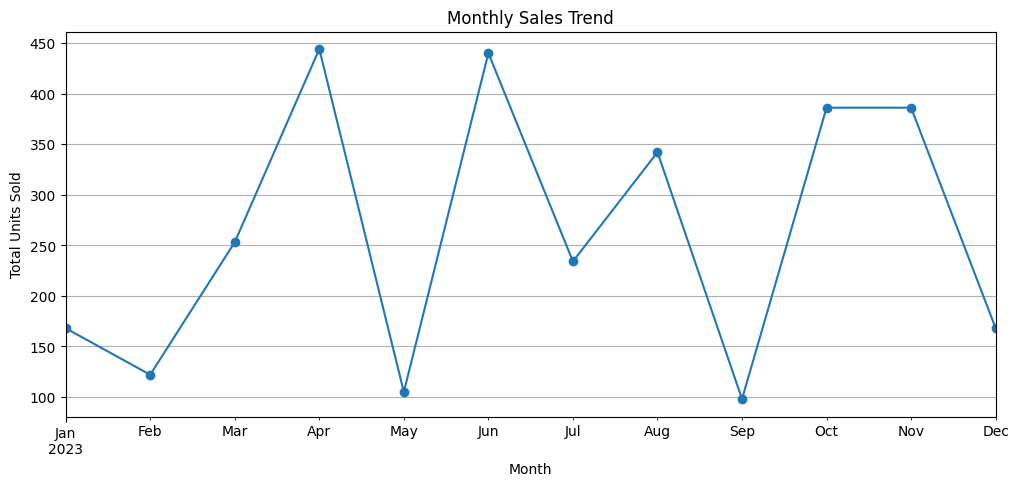

C:\Users\Ange Morel\AppData\Local\Temp\ipykernel_9828\610179179.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')


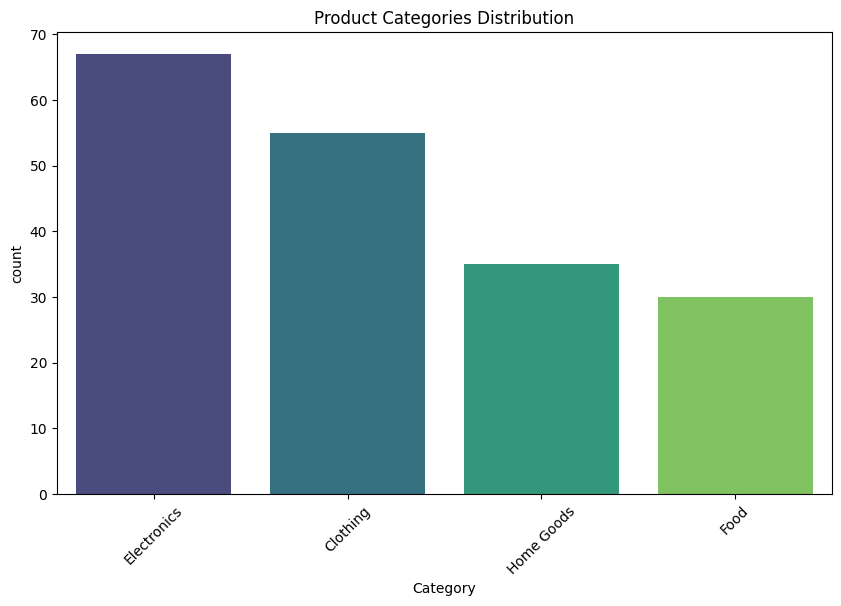

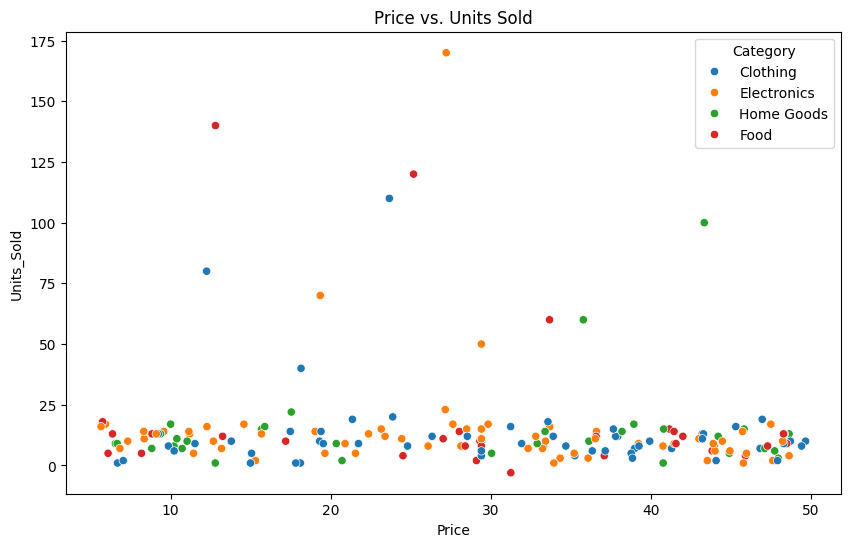


 KEY INSIGHTS:
 Top-Performing Warehouse: CENTRAL (545 units sold)
 Highest Avg Price Category: Clothing ($29.77)
 Out-of-Stock Ratio: 53.4% (Consider optimizing inventory)


In [127]:
# VISUALIZATIONS & INSIGHTS
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates if needed
df = df.dropna(subset=['Date'])

# Monthly Sales Trend
plt.figure(figsize=(12, 5))
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units_Sold'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.grid(True)
plt.show()

#  3.2 Top categories by frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title("Product Categories Distribution")
plt.xticks(rotation=45)
plt.show()

#  3.3 Price vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Units_Sold', hue='Category')
plt.title("Price vs. Units Sold")
plt.show()

#  3.4 KEY INSIGHTS
print("\n KEY INSIGHTS:")

# Highest-selling warehouse
top_warehouse = warehouse_sales.idxmax()
top_warehouse_units = warehouse_sales.max()
print(f" Top-Performing Warehouse: {top_warehouse} ({top_warehouse_units:.0f} units sold)")

# Most profitable category (by average price)
avg_price_per_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
top_category = avg_price_per_category.idxmax()
print(f" Highest Avg Price Category: {top_category} (${avg_price_per_category.max():.2f})")

# Out-of-stock ratio
out_of_stock_ratio = (df['In_Stock'] == False).mean() * 100
print(f" Out-of-Stock Ratio: {out_of_stock_ratio:.1f}% (Consider optimizing inventory)")
